In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
# 生成数据
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 创建并训练感知机模型
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [4]:
# 在测试集上进行预测
y_pred = perceptron.predict(X_test)

In [5]:
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率:{accuracy*100:.2f}%" )

准确率:100.00%


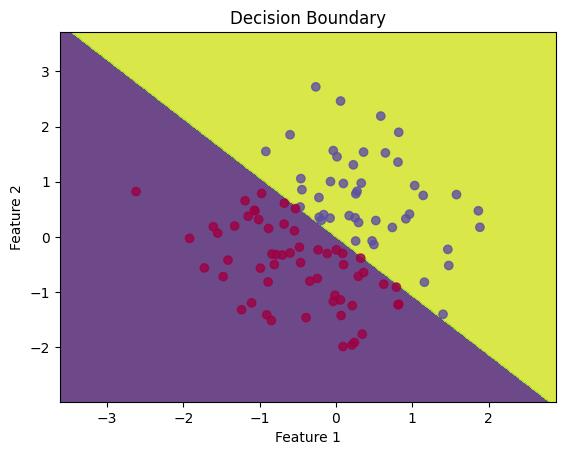

In [6]:
# 可视化结果
def plot_decision_boundary(X, y, model):
    # 设置图形尺寸
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 生成网格点，步长为0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    # 预测网格点上的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.8)
    # 绘制数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=0.8)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")


plot_decision_boundary(X, y, perceptron)
plt.show()